In [128]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
import plotly.express as px
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from IPython.core.display import HTML
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [129]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-20-2020.csv')

In [130]:
confirmed_df.head()
confirmed_df.to_csv(r'C:\Users\atoma\Desktop\data_animation.csv', index = False)

In [131]:
confirmed_df[confirmed_df['Country/Region'] == 'India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,...,10453,11487,12322,13430,14352,15722,17615,18539,20080,21370


In [132]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [133]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,40,43,54,99,112,131,135,150,166
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,232,248,251,277,283,302,314,327,345,356
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,601,691,708,783,846,894,1047,1099,1152,1204
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,128,169,169,191,205,235,248,282,309
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,5,5,5,6,6,6,6,6


In [134]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-20 23:36:47,34.223334,-82.461707,17,0,0,17,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-20 23:36:47,30.295065,-92.414197,114,7,0,107,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-20 23:36:47,37.767072,-75.632346,52,0,0,52,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-20 23:36:47,43.452658,-116.241552,598,10,0,588,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-20 23:36:47,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [135]:
cols = confirmed_df.keys()

In [136]:
confirmed = confirmed_df.iloc[:,4:-1]
deaths = deaths_df.iloc[:,4:-1]
recoveries = recoveries_df.iloc[:,4:-1]
dates = confirmed.keys()

In [137]:
world_cases = []
total_deaths = []
recovery_rate = []
total_recovered = []
total_active = []

In [138]:
#case-study (INDIA)
india_cases = []
india_total_deaths = []
india_recoveries = []

In [139]:
#USA-case study

In [140]:
usa_cases = []
usa_total_deaths = []
usa_recoveries = []

In [141]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recoveries_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    total_recovered.append(recoveries_sum)
    total_active.append(confirmed_sum - deaths_sum - recoveries_sum)
    recovery_rate.append(recoveries_sum/confirmed_sum)
    
    #india
    india_cases.append(confirmed_df[confirmed_df['Country/Region'] == 'India'][i].sum())
    india_total_deaths.append(deaths_df[deaths_df['Country/Region'] == 'India'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region'] == 'India'][i].sum())
    
    #USA
    usa_cases.append(confirmed_df[confirmed_df['Country/Region'] == 'US'][i].sum())
    usa_total_deaths.append(deaths_df[deaths_df['Country/Region'] == 'US'][i].sum())
    usa_recoveries.append(recoveries_df[recoveries_df['Country/Region'] == 'US'][i].sum())

In [142]:
def increase_daily(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[i])
        else:
            d.append(data[i]-data[i-1])
    return d        

In [143]:
world_cases_increase_daily = increase_daily(world_cases)
india_cases_increase_daily = increase_daily(india_cases)

world_deaths_increase_daily = increase_daily(total_deaths)
india_deaths_increase_daily = increase_daily(india_total_deaths)

world_recoveries_increase_daily = increase_daily(total_recovered)
india_recoveries_increase_daily = increase_daily(india_recoveries)

In [144]:
world_cases = np.array(world_cases).reshape(-1,1) 
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)
days_since = np.array([i for i in range(len(dates))]).reshape(-1,1)

In [145]:
days_future = 10
future_forcast = np.array([i for i in range(len(dates)+ days_future)]).reshape(-1,1)
adjusted_dates = future_forcast[:-10]

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( days_since, world_cases, test_size=0.07, random_state=42 , shuffle = False)

In [147]:
#learn about every syntax in this
start = '22/1/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [148]:
future_forcast_dates

['22/01/2020',
 '23/01/2020',
 '24/01/2020',
 '25/01/2020',
 '26/01/2020',
 '27/01/2020',
 '28/01/2020',
 '29/01/2020',
 '30/01/2020',
 '31/01/2020',
 '01/02/2020',
 '02/02/2020',
 '03/02/2020',
 '04/02/2020',
 '05/02/2020',
 '06/02/2020',
 '07/02/2020',
 '08/02/2020',
 '09/02/2020',
 '10/02/2020',
 '11/02/2020',
 '12/02/2020',
 '13/02/2020',
 '14/02/2020',
 '15/02/2020',
 '16/02/2020',
 '17/02/2020',
 '18/02/2020',
 '19/02/2020',
 '20/02/2020',
 '21/02/2020',
 '22/02/2020',
 '23/02/2020',
 '24/02/2020',
 '25/02/2020',
 '26/02/2020',
 '27/02/2020',
 '28/02/2020',
 '29/02/2020',
 '01/03/2020',
 '02/03/2020',
 '03/03/2020',
 '04/03/2020',
 '05/03/2020',
 '06/03/2020',
 '07/03/2020',
 '08/03/2020',
 '09/03/2020',
 '10/03/2020',
 '11/03/2020',
 '12/03/2020',
 '13/03/2020',
 '14/03/2020',
 '15/03/2020',
 '16/03/2020',
 '17/03/2020',
 '18/03/2020',
 '19/03/2020',
 '20/03/2020',
 '21/03/2020',
 '22/03/2020',
 '23/03/2020',
 '24/03/2020',
 '25/03/2020',
 '26/03/2020',
 '27/03/2020',
 '28/03/20

In [149]:
#SVM Regression model

In [150]:
svr_model = SVR(degree=4, C = 0.1 , epsilon=1 , gamma=0.01 , kernel = 'poly')

In [151]:
svr_model.fit(X_train, y_train)

C:\Users\atoma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=0.1, cache_size=200, coef0=0.0, degree=4, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [152]:
svm_pred = svr_model.predict(future_forcast)

In [153]:
svm_test_pred = svr_model.predict(X_test)

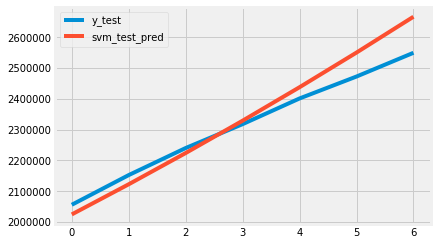

In [154]:
plt.plot(y_test)
plt.plot(svm_test_pred)
plt.legend(['y_test' , 'svm_test_pred'])
plt.show()

In [155]:
svr_model.score(X_test, y_test)*100

87.4632169592596

In [156]:
p_features1 = PolynomialFeatures(degree = 3)
p_features2 = PolynomialFeatures(degree = 4)

In [157]:
X_p_train_poly = p_features1.fit_transform(X_train)
X_p_test_poly = p_features1.fit_transform(X_test)
poly_p_forcast = p_features1.fit_transform(future_forcast)

X_b_train_poly = p_features2.fit_transform(X_train)
X_b_test_poly = p_features2.fit_transform(X_test)
poly_b_forcast = p_features2.fit_transform(future_forcast)

In [158]:
#polynomial-regression-model

In [159]:
lmodel = LinearRegression(normalize=True)

In [160]:
lmodel.fit(X_p_train_poly , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [161]:
poly_pred = lmodel.predict(poly_p_forcast)

In [162]:
p_test_pred = lmodel.predict(X_p_test_poly)

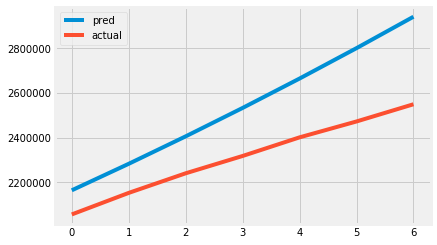

In [163]:
plt.plot(p_test_pred)
plt.plot(y_test)
plt.legend(['pred','actual'])
plt.show()

In [164]:
#BayesianRidge model

In [165]:
bmodel = BayesianRidge()

In [166]:
bmodel.fit(X_b_train_poly , y_train)

C:\Users\atoma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [167]:
b_pred = bmodel.predict(poly_b_forcast)

In [168]:
b_test_pred = bmodel.predict(X_b_test_poly)

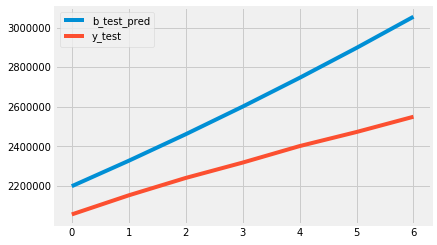

In [169]:
plt.plot(b_test_pred)
plt.plot(y_test)
plt.legend(['b_test_pred', 'y_test'])
plt.show()

In [170]:
#DATA-Visualization

Text(0, 0.5, 'no. of cases')

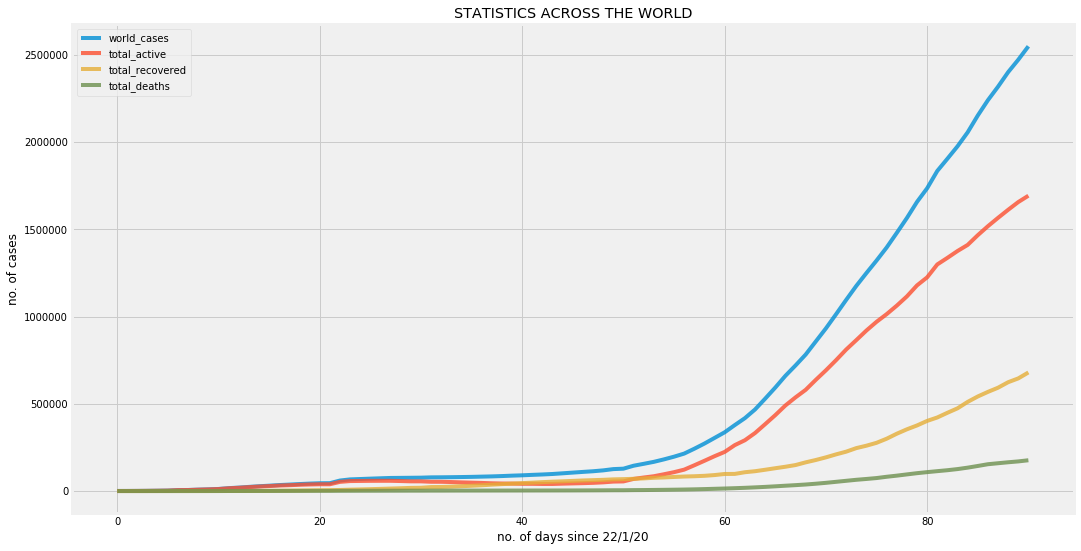

In [171]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates.reshape(1,-1)[0] , world_cases , alpha = 0.8)
plt.plot(adjusted_dates.reshape(1,-1)[0] , total_active, alpha = 0.8)
plt.plot(adjusted_dates.reshape(1,-1)[0] , total_recovered, alpha = 0.8)
plt.plot(adjusted_dates.reshape(1,-1)[0] , total_deaths, alpha = 0.8)
plt.legend(['world_cases','total_active' , 'total_recovered' , 'total_deaths'])
plt.title('STATISTICS ACROSS THE WORLD')
plt.xlabel('no. of days since 22/1/20')
plt.ylabel('no. of cases')

In [172]:
px.line(x = adjusted_dates.reshape(1,-1)[0] , y = recovery_rate ,title = 'RATE OF RECOVERY ACROSS THE WORLD',
        labels={'a':'b'})

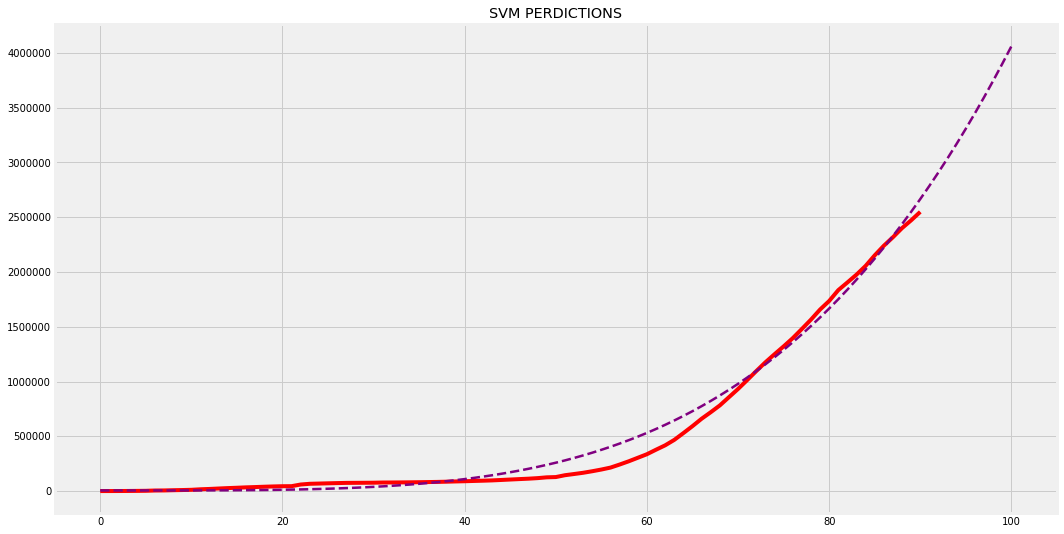

In [173]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates , world_cases , color = 'red')
plt.plot(future_forcast , svm_pred , linestyle = 'dashed' , linewidth= 2.5 , color = 'purple')
plt.title('SVM PERDICTIONS')
plt.show()

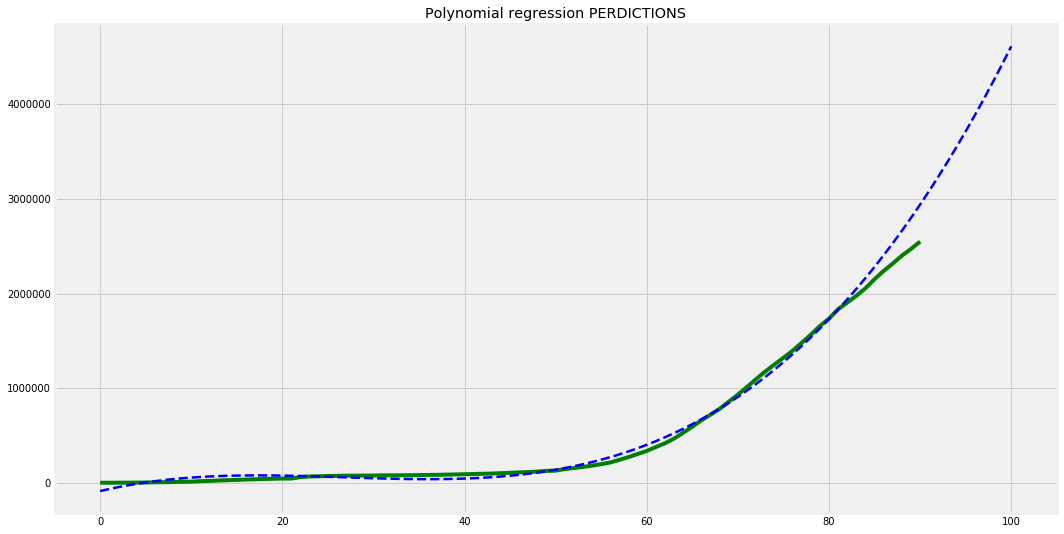

In [174]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates , world_cases , color = 'green')
plt.plot(future_forcast , poly_pred , linestyle = 'dashed' , linewidth= 2.5 , color = 'blue')

plt.title('Polynomial regression PERDICTIONS')
plt.show()

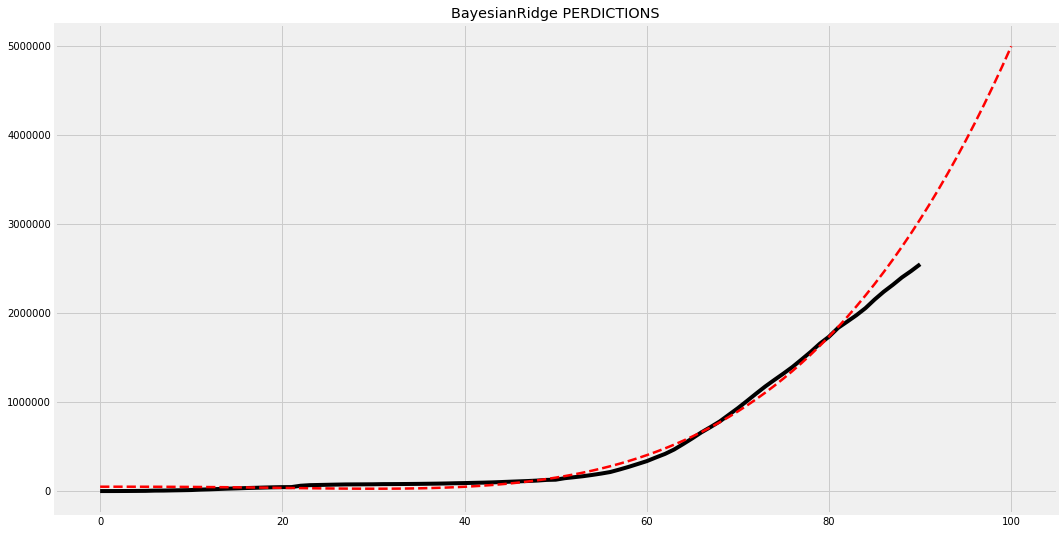

In [175]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates , world_cases , color = 'black')
plt.plot(future_forcast , b_pred , linestyle = 'dashed' , linewidth= 2.5 , color = 'red')
plt.title('BayesianRidge PERDICTIONS')
plt.show()

In [176]:
#CASE STUDY(INDIA)

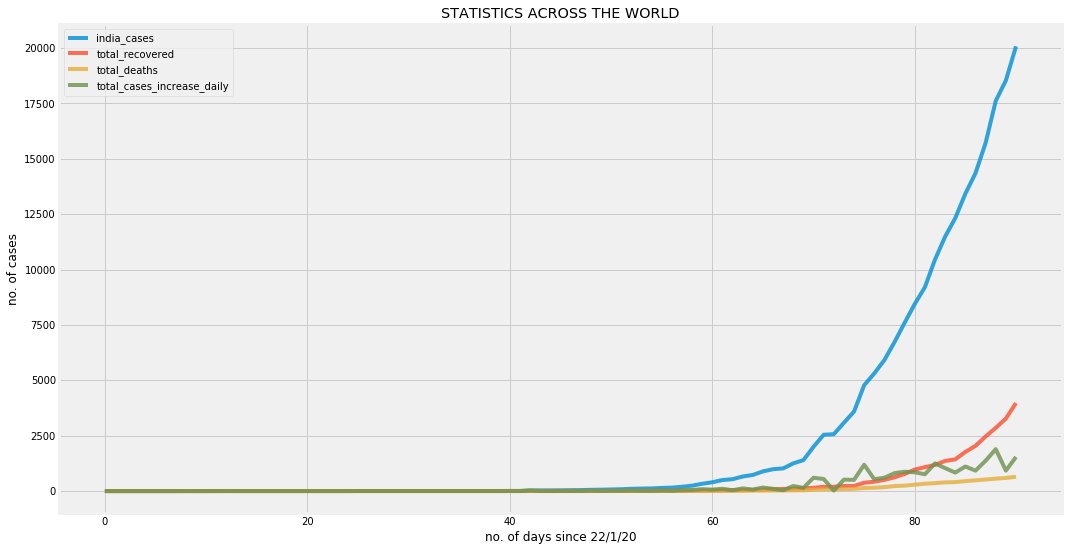

In [177]:
plt.figure(figsize=(16,9))
#plt.plot(adjusted_dates.reshape(1,-1)[0] , world_cases , alpha = 0.8)
plt.plot(adjusted_dates.reshape(1,-1)[0] , india_cases , alpha = 0.8)
plt.plot(adjusted_dates.reshape(1,-1)[0] , india_recoveries, alpha = 0.8)
plt.plot(adjusted_dates.reshape(1,-1)[0] , india_total_deaths, alpha = 0.8)
plt.plot(adjusted_dates.reshape(1,-1)[0] , india_cases_increase_daily, alpha = 0.8)
plt.legend(['india_cases' , 'total_recovered', 'total_deaths','total_cases_increase_daily' ])
plt.title('STATISTICS ACROSS THE WORLD')
plt.xlabel('no. of days since 22/1/20')
plt.ylabel('no. of cases')
plt.show()

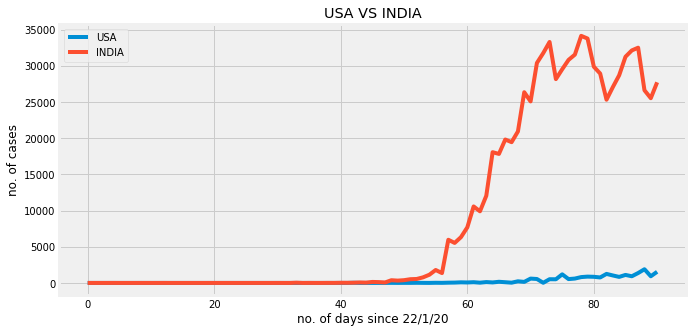

In [178]:
plt.figure(figsize=(10,5))
plt.plot(adjusted_dates.reshape(1,-1)[0] , increase_daily(india_cases))
plt.plot(adjusted_dates.reshape(1,-1)[0] , increase_daily(usa_cases))
plt.title('USA VS INDIA')
plt.legend(['USA' , 'INDIA'])
plt.xlabel('no. of days since 22/1/20')
plt.ylabel('no. of cases')
plt.show()

In [179]:
#FINALLY THE ERRORS ON THE PREDICTED VALUES OF THE DIFFERENT MODELS DEPLOYED

In [180]:
#polynoimal regression

In [181]:
print('mean-squared-error:' , mean_squared_error(p_test_pred , y_test))
print('mean_absolute_error:' , mean_absolute_error(p_test_pred, y_test))

mean-squared-error: 61850806039.74163
mean_absolute_error: 228891.3213084309


In [182]:
#BayesianRidge model

In [183]:
print('mean-squared-error:' , mean_squared_error(b_test_pred , y_test))
print('mean_absolute_error:' , mean_absolute_error(b_test_pred, y_test))

mean-squared-error: 104819104812.03738
mean_absolute_error: 299284.68161068804


In [184]:
#SVM model

In [185]:
print('mean-squared-error:' , mean_squared_error(svm_test_pred , y_test))
print('mean_absolute_error:' , mean_absolute_error(svm_test_pred, y_test))

mean-squared-error: 3332714225.0971727
mean_absolute_error: 45688.836852844935


In [186]:
#some predictions regarding the rise of cases 

In [187]:
next_10_days_world = np.arange(1,11)


In [188]:
future_forcast_dates[-11:-1]

['21/04/2020',
 '22/04/2020',
 '23/04/2020',
 '24/04/2020',
 '25/04/2020',
 '26/04/2020',
 '27/04/2020',
 '28/04/2020',
 '29/04/2020',
 '30/04/2020']

In [189]:
predictions = svr_model.predict(future_forcast[-11:-1])

In [190]:
predictions

array([2666300.17695005, 2786517.91353218, 2910764.88265906,
       3039130.12366358, 3171703.64898614, 3308576.44417455,
       3449840.46788413, 3595588.65187761, 3745914.90102523,
       3900914.0933047 ])

In [191]:
f_df = pd.DataFrame()

In [192]:
f_df['Dates'] = future_forcast_dates[-11:-1]
f_df['predictions'] = predictions

In [193]:
#world death predictions
f_df

,Dates,predictions
0,21/04/2020,2.666300e+06
1,22/04/2020,2.786518e+06
2,23/04/2020,2.910765e+06
3,24/04/2020,3.039130e+06
4,25/04/2020,3.171704e+06
5,26/04/2020,3.308576e+06
6,27/04/2020,3.449840e+06
7,28/04/2020,3.595589e+06
8,29/04/2020,3.745915e+06
9,30/04/2020,3.900914e+06


In [194]:
#latest statistics around the world

In [195]:
latest_data.keys()

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [196]:
countries = latest_data['Country_Region'].unique()

In [197]:
no_of_cases = []
no_of_deaths = []
no_of_recovered = []
no_of_active = []
number = [] 
for country in countries:
    number.append(latest_data[latest_data['Country_Region'] == country]['Active'].sum())
    
unique_countries = [k for k, v in sorted(zip(countries, number), key=operator.itemgetter(1), reverse=True)]
for country in unique_countries:
    no_of_active.append(latest_data[latest_data['Country_Region'] == country]['Active'].sum())
    no_of_deaths.append(latest_data[latest_data['Country_Region'] == country]['Deaths'].sum())
    no_of_recovered.append(latest_data[latest_data['Country_Region'] == country]['Recovered'].sum())
    no_of_cases.append(latest_data[latest_data['Country_Region'] == country]['Confirmed'].sum())

In [198]:
country_df = pd.DataFrame({'Country' : countries , 'Active' : no_of_active , 'Deaths' : no_of_deaths , 'Recovered' : no_of_recovered,
                            'Confirmed' : no_of_cases})

country_df.style.background_gradient(cmap='Greens')

,Country,Active,Deaths,Recovered,Confirmed
0,US,669903,42094,72329,784326
1,Canada,108860,16550,446,125856
2,United Kingdom,108237,24114,48877,181228
3,China,98771,20852,80587,200210
4,Netherlands,98152,20292,38036,156480
5,Australia,75410,2140,13430,90980
6,Denmark,50703,4862,91500,147065
7,France,43270,405,3446,47121
8,Afghanistan,29502,3764,322,33588
9,Albania,25260,5828,8895,39983
